In [ ]:
#######################################################################################
# Author: Srijan Verma                                                              #
# School of Pharmacy                                                                #
# Sirimulla Research Group [http://www.sirimullaresearchgroup.com/]                 #
# The University of Texas at El Paso, TX, USA                                       #
# Last modified: 19/12/2019                                                         #
# Copyright (c) 2019 Srijan Verma and Sirimulla Research Group, under MIT license   #
#######################################################################################

In [1]:
import pandas as pd

In [2]:
df_all = pd.read_csv('../results/whichp450/default_models/merged.csv', index_col=0)

In [24]:
for i in range(len(df_all)):
    if df_all['Output_Target'][i] == '20.0':
        df_all['Output_Target'][i] = '2E1'

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [25]:
target_list = list(df_all['Output_Target'].unique())

In [26]:
fp_list = list(df_all['Input_feature'].unique())

In [27]:
df_all.head(2)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_positive_size,...,Cohen_Score_Test,Precision_0_Test,Recall_0_Test,F1_Score_0_Test,AUC_output_0_Test,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,AUC_output_1_Test,Log_Loss_Test
0,1A2,ecfp6_rdkDes_avalon_hashap,LogisticRegression_default,"{'C': [1.0], 'class_weight': [None], 'dual': [...",0.007,1041,884,157,0,267,...,-,-,-,-,-,-,-,-,-,-
1,1A2,fcfp6,SGDClassifier_default,"{'alpha': [0.0001], 'average': [False], 'class...",0.006,1041,884,157,0,267,...,-,-,-,-,-,-,-,-,-,-


In [28]:
from tqdm import tqdm_notebook

In [29]:
len(fp_list)

21

In [30]:
# subcell_loc_list

In [31]:
df_all_index_test = df_all.set_index(['Output_Target', 'Input_feature'])

In [32]:
df_columns = df_all.columns.values.tolist()
df_filtered_test = pd.DataFrame(columns = df_columns)
df_filtered_test
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_positive_size,...,Cohen_Score_Test,Precision_0_Test,Recall_0_Test,F1_Score_0_Test,AUC_output_0_Test,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,AUC_output_1_Test,Log_Loss_Test


In [33]:
# df = df_all_index.loc['cytoskeleton', 'maccs_fp']
# df.reset_index(drop=False, inplace=True)
# df

In [12]:
for i in tqdm_notebook((target_list)):
    for j in fp_list:
        try:
            
            df = df_all_index_test.loc[i, j]
            df.reset_index(drop=False, inplace=True)
            index = df['Cohen_Score_Test'].idxmax()
            df_filtered_test = df_filtered_test.append(df.iloc[index], ignore_index = True)
            
        except:
            pass

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


In [13]:
df_filtered_test.head(1)
df_filtered_test.reset_index(drop=True,inplace=True)
len(df_filtered_test)

1653

In [14]:
df_filtered_test.to_csv('../results/two_paper_trans_results/default_models/results_1653_all_fp_best_models_test.csv')

In [34]:
df_all_index_val = df_all.set_index(['Output_Target', 'Input_feature'])

df_columns = df_all.columns.values.tolist()
df_filtered_val = pd.DataFrame(columns = df_columns)
# df_filtered_val
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

for i in tqdm_notebook((target_list)):
    for j in fp_list:
        try:
            
            df = df_all_index_val.loc[i, j]
            df.reset_index(drop=False, inplace=True)
            index = df['Cohen_Score_Val'].idxmax()
            df_filtered_val = df_filtered_val.append(df.iloc[index], ignore_index = True)
            
        except:
            pass

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:12: PerformanceWarning: indexing past lexsort depth may impact performance.


In [35]:
df_filtered_val.head(1)
df_filtered_val.reset_index(drop=True,inplace=True)
len(df_filtered_val)

147

In [36]:
df_filtered_val.to_csv('../results/whichp450/default_models/results_147_all_fp_best_models_val.csv')

In [15]:
df_columns = df_all.columns.values.tolist()
df_filtered_2_test = pd.DataFrame(columns = df_columns)
df_filtered_2_test
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_positive_size,...,Cohen_Score_Test,Precision_0_Test,Recall_0_Test,F1_Score_0_Test,AUC_output_0_Test,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,AUC_output_1_Test,Log_Loss_Test


In [17]:
df_filtered_index_test = df_all.set_index('Output_Target')

for i in tqdm_notebook((target_list)):
   # try:

    df = df_filtered_index_test.loc[i]
    df.reset_index(drop=False, inplace=True)
    index = df['Cohen_Score_Test'].idxmax()
    df_filtered_2_test = df_filtered_2_test.append(df.iloc[index], ignore_index = True)

    #except:
     #   pass

In [18]:
len(df_filtered_2_test)

87

In [21]:
df_filtered_2_test.to_csv('../results/two_paper_trans_results/default_models/results_87_best_models_test.csv')

In [37]:
df_columns = df_all.columns.values.tolist()
df_filtered_2_val = pd.DataFrame(columns = df_columns)
df_filtered_2_val
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_positive_size,...,Cohen_Score_Test,Precision_0_Test,Recall_0_Test,F1_Score_0_Test,AUC_output_0_Test,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,AUC_output_1_Test,Log_Loss_Test


In [38]:
df_filtered_index_val = df_all.set_index('Output_Target')

for i in tqdm_notebook((target_list)):
   # try:

    df = df_filtered_index_val.loc[i]
    df.reset_index(drop=False, inplace=True)
    index = df['Cohen_Score_Val'].idxmax()
    df_filtered_2_val = df_filtered_2_val.append(df.iloc[index], ignore_index = True)

    #except:
     #   pass

In [39]:
for i in range(len(df_filtered_2_val)):
    if df_filtered_2_val['Output_Target'][i] == '20.0':
        print(i)

In [40]:
df_filtered_2_val.sort_values('Output_Target',ascending=True,inplace=True)
df_filtered_2_val.reset_index(drop=True,inplace=True)
df_filtered_2_val.to_csv('../results/whichp450/default_models/results_7_best_models_val.csv')

In [22]:
df_filtered_2_val.sort_values('Train_positive_size',ascending=False,inplace=True)
df_filtered_2_val.reset_index(drop=True,inplace=True)
df_filtered_2_val.to_csv('../results/two_paper_trans_results/default_models/choosing_main_enzymes/results_87_best_models_val_train_pos_size.csv')
df_filtered_2_val.sort_values('Cohen_Score_Val',ascending=False,inplace=True)
df_filtered_2_val.reset_index(drop=True,inplace=True)
df_filtered_2_val.to_csv('../results/two_paper_trans_results/default_models/choosing_main_enzymes/results_87_best_models_val_cohen_val.csv')


In [23]:
df_imp = df_filtered_2_val[['Output_Target', 'Train_positive_size', 'Cohen_Score_Val', 'Cohen_Score_Test']]

In [24]:
df_imp.to_csv('../results/two_paper_trans_results/default_models/choosing_main_enzymes/imp.csv')

In [25]:
imp_targets = ['2C9','2C19','2D6'
              ,'1A2','3A4','1A1',
              '2C8','2E1','3A5'
              ,'GST','MET','NAT'
              ,'SUL','UGT']


In [26]:
s = 'UGT_inh'
if imp_targets[-1] in s:
    print(True)

True


In [27]:
keep_index = []
for i in tqdm_notebook(range(len(df_filtered_2_val))):
    for j in imp_targets:
        if j in df_filtered_2_val['Output_Target'][i] and 'Solute' not in df_filtered_2_val['Output_Target'][i]:
            keep_index.append(i)
            continue
        else:
            continue
            
    

In [28]:
len(keep_index)

41

In [29]:
df_imp_cleaned = df_filtered_2_val.ix[keep_index]
df_imp_cleaned.reset_index(drop=True,inplace=True)
df_imp_cleaned.sort_values('Output_Target',ascending=True,inplace=True)
df_imp_cleaned.reset_index(drop=True,inplace=True)
df_imp_cleaned.to_csv('../results/two_paper_trans_results/default_models/imp_enzymes_all.csv')

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [30]:
df_imp_cleaned_inh = df_imp_cleaned[df_imp_cleaned['Output_Target'].str.contains("_inh")]
df_imp_cleaned_inh.reset_index(drop=True,inplace=True)
df_imp_cleaned_inh.sort_values('Output_Target',ascending=True,inplace=True)
df_imp_cleaned_inh.reset_index(drop=True,inplace=True)
df_imp_cleaned_inh.to_csv('../results/two_paper_trans_results/default_models/imp_enz_all_inh.csv')

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [31]:
df_imp_cleaned_sub = df_imp_cleaned[df_imp_cleaned['Output_Target'].str.contains("_sub")]
df_imp_cleaned_sub.reset_index(drop=True,inplace=True)
df_imp_cleaned_sub.sort_values('Output_Target',ascending=True,inplace=True)
df_imp_cleaned_sub.reset_index(drop=True,inplace=True)
df_imp_cleaned_sub.to_csv('../results/two_paper_trans_results/default_models/imp_enz_all_sub.csv')

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [32]:
df_imp_cleaned_ind = df_imp_cleaned[df_imp_cleaned['Output_Target'].str.contains("_ind")]
df_imp_cleaned_ind.reset_index(drop=True,inplace=True)
df_imp_cleaned_ind.sort_values('Output_Target',ascending=True,inplace=True)
df_imp_cleaned_ind.reset_index(drop=True,inplace=True)
df_imp_cleaned_ind.to_csv('../results/two_paper_trans_results/default_models/imp_enz_all_ind.csv')

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [33]:
df_combine_feat = pd.read_csv('../results/two_paper_trans_results/default_models/merged_combine_fp_805.csv',index_col=0)

In [38]:
df_columns = df_all.columns.values.tolist()
df_filtered_feat = pd.DataFrame(columns = df_columns)
df_filtered_feat
# df_filtered = df_filtered.append(d.iloc[d['Cohen Score'].idxmax()], ignore_index = True)

,Output_Target,Input_feature,Models,Hyperparameters_Used,Model_RunTime_min,Dataset_size,Train_size,Val_size,Test_size,Train_positive_size,...,Cohen_Score_Test,Precision_0_Test,Recall_0_Test,F1_Score_0_Test,AUC_output_0_Test,Precision_1_Test,Recall_1_Test,F1 Score_1_Test,AUC_output_1_Test,Log_Loss_Test


In [39]:
tg = list(df_combine_feat['Output_Target'].unique())
df_combine_feat_index = df_combine_feat.set_index('Output_Target')

for i in tqdm_notebook((tg)):
   # try:

    df = df_combine_feat_index.loc[i]
    df.reset_index(drop=False, inplace=True)
    index = df['Cohen_Score_Val'].idxmax()
    df_filtered_feat = df_filtered_feat.append(df.iloc[index], ignore_index = True)

    #except:
     #   pass

In [40]:
df_filtered_feat.to_csv('../results/two_paper_trans_results/default_models/best_val_combine_feat_41.csv')

In [49]:
a = {}
for i in range(len(df_imp_cleaned)):
    a[df_imp_cleaned['Output_Target'][i]] = {'dataset_size':df_imp_cleaned['Dataset_size'][i]
                                             ,'actives':(df_imp_cleaned['Train_positive_size'][i]+df_imp_cleaned['Val_positive_size'][i]+df_imp_cleaned['Test_positive_size'][i])
                                            ,'inactives':(df_imp_cleaned['Dataset_size'][i]-(df_imp_cleaned['Train_positive_size'][i]+df_imp_cleaned['Val_positive_size'][i]+df_imp_cleaned['Test_positive_size'][i]))
                                            ,'cohen_k_test':round(df_imp_cleaned['Cohen_Score_Test'][i],3)
                                            ,'cohen_k_val':round(df_imp_cleaned['Cohen_Score_Val'][i],3)
                                            ,'auc_1_test':round(df_imp_cleaned['AUC_output_1_Test'][i],3)
                                            ,'accuracy_test':round(df_imp_cleaned['Accuracy_Test'][i],3)
                                            ,'f1_score_1_test':round(df_imp_cleaned['F1 Score_1_Test'][i],3)}

In [52]:
len(a)
# a

41

In [41]:
dif_val = []
dif_test = []
for i in range(len(df_imp_cleaned)):
    dif_test.append(df_filtered_feat['Cohen_Score_Test'][i] - df_imp_cleaned['Cohen_Score_Test'][i])
    dif_val.append(df_filtered_feat['Cohen_Score_Val'][i] - df_imp_cleaned['Cohen_Score_Val'][i])

In [53]:
# dif_val

In [19]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

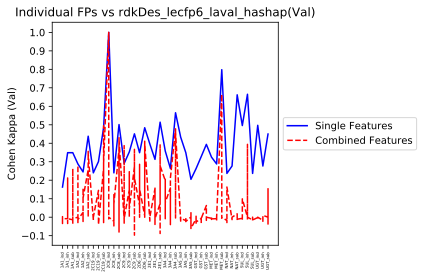

In [69]:
tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('Individual FPs vs rdkDes_lecfp6_laval_hashap(Val)')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=4)
plt.xticks(rotation=89)
ax.set_ylabel('Cohen Kappa (Val)')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.plot(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['Cohen_Score_Val'].tolist(), c='b', label='Single Features')
plt.plot(df_combine_feat['Output_Target'].tolist(), df_combine_feat['Cohen_Score_Val'].tolist(), c='r', linestyle="--", label='Combined Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/two_paper_trans_results/default_model_graphs/single_feat_vs_combined_feat_val.png',dpi=1200)
plt.show()

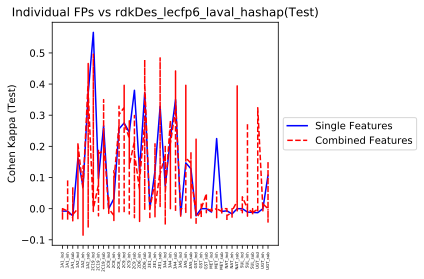

In [70]:
tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('Individual FPs vs rdkDes_lecfp6_laval_hashap(Test)')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=4)
plt.xticks(rotation=89)
ax.set_ylabel('Cohen Kappa (Test)')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.plot(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['Cohen_Score_Test'].tolist(), c='b', label='Single Features')
plt.plot(df_combine_feat['Output_Target'].tolist(), df_combine_feat['Cohen_Score_Test'].tolist(), c='r', linestyle="--", label='Combined Features')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/two_paper_trans_results/default_model_graphs/single_feat_vs_combined_feat_test.png',dpi=1200)
plt.show()

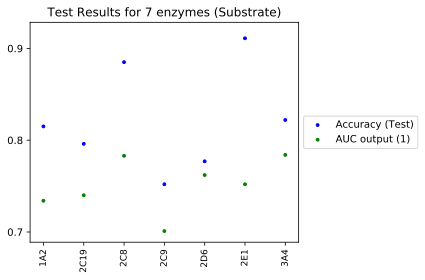

In [47]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.1

fig, ax = plt.subplots(1,1)

plt.title('Test Results for 7 enzymes (Substrate)')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=9)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['Accuracy_Val'].tolist(), c='b',s=8, label='Accuracy (Test)')
# plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['Cohen_Score_Val'].tolist(), c='r',s=8, label='Cohen Kappa (Test)')
# plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['F1_Score_1_Val'].tolist(), c='y',s=8, label='F1 Score (1)')
plt.scatter(df_filtered_2_val['Output_Target'].tolist(), df_filtered_2_val['AUC_output_1_Val'].tolist(), c='g',s=8, label='AUC output (1)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/whichp450/default_model_graphs/best_model_scores_test.png',dpi=1200)
plt.show()

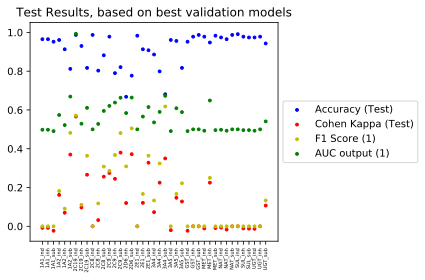

In [77]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.2

fig, ax = plt.subplots(1,1)

plt.title('Test Results, based on best validation models')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=5)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['Accuracy_Test'].tolist(), c='b',s=8, label='Accuracy (Test)')
plt.scatter(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['Cohen_Score_Test'].tolist(), c='r',s=8, label='Cohen Kappa (Test)')
plt.scatter(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['F1 Score_1_Test'].tolist(), c='y',s=8, label='F1 Score (1)')
plt.scatter(df_imp_cleaned['Output_Target'].tolist(), df_imp_cleaned['AUC_output_1_Test'].tolist(), c='g',s=8, label='AUC output (1)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/two_paper_trans_results/default_model_graphs/test_scores_based_on_best_val_models_imp.png',dpi=1200)
plt.show()

In [106]:
df_all = pd.concat([df_all,df_combine_feat], axis=0)
df_all.drop_duplicates(inplace=True)
df_all.reset_index(drop=True,inplace=True)
df_all_fp_index = df_all.set_index('Input_feature')
fp_list = list(df_all['Input_feature'].unique())

In [108]:
len(df_all)

46685

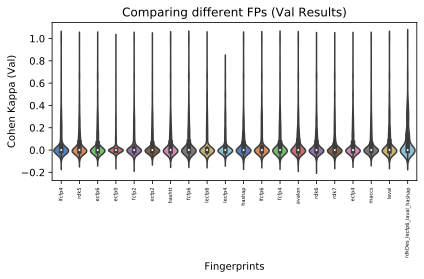

In [109]:
import seaborn as sns
from matplotlib import pylab
import matplotlib.ticker as ticker
dataset_classifiers = []
for i in tqdm_notebook(range(len(fp_list))):
    
    try:
        dataset_classifiers.append(list(df_all_fp_index.loc[fp_list[i]]['Cohen_Score_Val'].values))
    except:
        pass
    
tick_spacing = 0.2
ax = sns.violinplot(data= (dataset_classifiers), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Fingerprints')
ax.set_ylabel('Cohen Kappa (Val)')
ax.set_title('Comparing different FPs (Val Results)')
ax.set_xticklabels(fp_list)
plt.rc('xtick',labelsize=9)
plt.rc('ytick',labelsize=9)
plt.xticks(rotation=89)
plt.tight_layout()
# plt.savefig('../dataset/pdsp_pharos_combined/comparing_diff_fp/correct_split_task/results/default_model_graphs/comparison_diff_fps_val_10_models.png',dpi=1200)

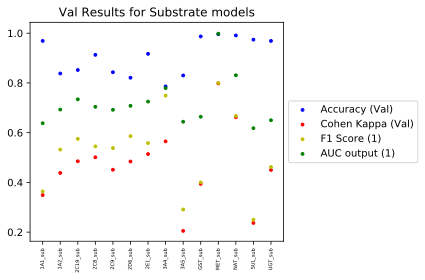

In [62]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.2

fig, ax = plt.subplots(1,1)

plt.title('Val Results for Substrate models')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=7)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['Accuracy_Val'].tolist(), c='b',s=8, label='Accuracy (Val)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['Cohen_Score_Val'].tolist(), c='r',s=8, label='Cohen Kappa (Val)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['F1_Score_1_Val'].tolist(), c='y',s=8, label='F1 Score (1)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['AUC_output_1_Val'].tolist(), c='g',s=8, label='AUC output (1)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig('../results/two_paper_trans_results/default_model_graphs/best_model_scores_val_sub.png',dpi=1200)
plt.show()

In [69]:
# import matplotlib.pyplot as plt
# from matplotlib import pylab
# import matplotlib.ticker as ticker

# tick_spacing = 0.05

# fig, ax = plt.subplots(1,1)

# plt.title('Test Results for 40 sub_loc models')
# plt.rc('xtick',labelsize=5)
# plt.xticks(rotation=89)

# ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

# plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['Accuracy_Test'].tolist(), c='b',s=8, label='Accuracy (Test)')
# plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['Cohen_Score_Test'].tolist(), c='r',s=8, label='Cohen Kappa (Test)')
# plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['F1 Score_1_Test'].tolist(), c='y',s=8, label='F1 Score (1)')
# plt.scatter(df_filtered_2_test['Output_Target'].tolist(), df_filtered_2_test['AUC_output_1_Test'].tolist(), c='g',s=8, label='AUC output (1)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
# plt.savefig('../dataset/pdsp_pharos_combined/results/default_model_graphs/best_model_scores_test.png',dpi=1200)
# plt.show()

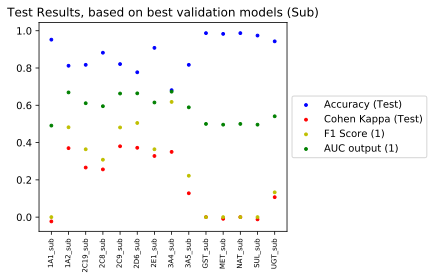

In [74]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker

tick_spacing = 0.2

fig, ax = plt.subplots(1,1)

plt.title('Test Results, based on best validation models (Sub)')
# plt.xticks(df_40['Subcell_Location'].tolist())
plt.rc('xtick',labelsize=7)
plt.xticks(rotation=89)
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['Accuracy_Test'].tolist(), c='b',s=8, label='Accuracy (Test)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['Cohen_Score_Test'].tolist(), c='r',s=8, label='Cohen Kappa (Test)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['F1 Score_1_Test'].tolist(), c='y',s=8, label='F1 Score (1)')
plt.scatter(df_imp_cleaned_sub['Output_Target'].tolist(), df_imp_cleaned_sub['AUC_output_1_Test'].tolist(), c='g',s=8, label='AUC output (1)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('../results/two_paper_trans_results/default_model_graphs/test_scores_based_on_best_val_models_sub.png',dpi=1200)
plt.show()

In [67]:
classifiers = list(df_all['Models'].unique())

In [68]:
len(classifiers)

31

In [69]:
df_all_fp_index = df_all.set_index(['Models', 'Input_feature'])

In [70]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
from cycler import cycler

/Users/pankajverma/anaconda3/envs/seqcomhol/lib/python3.6/site-packages/ipykernel/__main__.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.


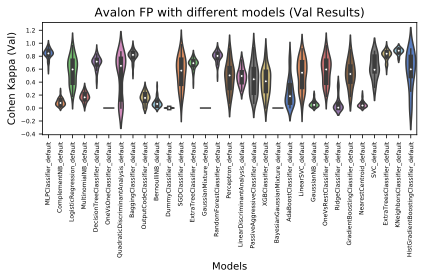

In [98]:
dataset_classifiers = []
for i in tqdm_notebook(range(len(classifiers))):
    try:
        
        dataset_classifiers.append(list(df_all_fp_index.loc[classifiers[i], 'avalon_fp']['Cohen_Score_Val'].values))
    except:
        pass
tick_spacing = 0.2
ax = sns.violinplot(data= (dataset_classifiers), palette="muted",scale='width')
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_xlabel('Models')
ax.set_ylabel('Cohen Kappa (Val)')
ax.set_title('Avalon FP with different models (Val Results)')
ax.set_xticklabels(classifiers)
plt.rc('xtick',labelsize=6)
plt.rc('ytick',labelsize=6)
plt.xticks(rotation=89)
plt.tight_layout()
plt.savefig('../dataset/pdsp_pharos_combined/results/default_model_graphs/fp/val/avalon_fp_val.png',dpi=1200)

In [99]:
df_all_sub_index = df_all.set_index('Output_Target')

sub_unique = list(df_all['Output_Target'].unique())

In [100]:
len(sub_unique)

40

In [106]:
for i in tqdm_notebook(range(len(sub_unique))):
    plt.figure()
    data = []
    for j in ('Accuracy_Val', 'Cohen_Score_Val', 'F1_Score_1_Val', 'AUC_output_1_Val'):
        try: 
            data.append(list(df_all_sub_index.loc[sub_unique[i]][j].values))
        except:
            pass
    ax = sns.violinplot(data= (data), palette="muted",scale='width')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title(sub_unique[i] + ' (Val)')
    ax.set_xticklabels(['Accuracy', 'Cohen Kappa', 'F1 Score (1)', 'AUC output (1)'])
    plt.rc('xtick',labelsize=9)
    plt.rc('ytick',labelsize=9)
    plt.xticks(rotation=89)
    plt.tight_layout()
    plt.savefig('../dataset/pdsp_pharos_combined/results/default_model_graphs/subcell_location/val/'+sub_unique[i]+'.png',dpi=1200)

In [118]:
df_all_model_index = df_all.set_index('Models')
mod = list(df_all['Models'].unique())

In [119]:
metric_list = ['Accuracy_Test', 'Cohen_Score_Test', 'F1 Score_1_Test', 'AUC_output_1_Test']

In [121]:
for i in range(len(metric_list)):
    plt.figure()
    data = []
    for j in (range(len(mod))):
        try: 
            data.append(list(df_all_model_index.loc[mod[j]][metric_list[i]].values))
        except:
            pass
    ax = sns.violinplot(data= (data), palette="muted",scale='width')
    ax.set_xlabel('Models')
    if i == 0:  
        ax.set_ylabel('Accuracy')
        ax.set_title('Overall Accuracy (Test) for various classifiers')
    elif i == 1:
        ax.set_ylabel('Cohen Kappa')
        ax.set_title('Overall Cohen Kappa (Test) for various classifiers')     
    elif i == 2:
        ax.set_ylabel('F1 Score')
        ax.set_title('Overall F1 Score (Test) for various classifiers')       
    elif i == 3:
        ax.set_ylabel('AUC')
        ax.set_title('Overall AUC_output(1) (Test) for various classifiers')  
    ax.set_xticklabels(mod)
    plt.rc('xtick',labelsize=6)
    plt.rc('ytick',labelsize=6)
    plt.xticks(rotation=89)
    plt.tight_layout()
    plt.savefig('../dataset/pdsp_pharos_combined/results/default_model_graphs/evaluation_metrics/test/'+metric_list[i]+'.png',dpi=1200)